In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.33055518,  0.11538662,  0.75474701, -0.73042111, -0.61133311,
         0.35421029,  0.31739497,  0.24558509, -0.35388767, -0.37863099],
       [ 1.11920819,  0.79344117,  2.78167871, -1.5668162 , -1.51534093,
         1.02440253,  1.47240109,  0.90808915, -1.0035541 ,  1.05431769]])

In [4]:
test_Features[:2]

array([[-0.74531788, -0.52525291, -0.93552655,  0.61525053,  0.77408828,
         0.10040191, -0.41456572,  0.09194719,  0.56451099, -1.13108828],
       [ 0.70074656, -0.71361987, -0.94504862,  1.10100517,  0.87815324,
         1.33544136,  0.55453791, -0.3575342 , -0.96807916,  1.30377633]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=30*4,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=30*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=30*2,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=30,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(10, activation='tanh'))

In [20]:
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 120)            480       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 120)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 90)             32490     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 90)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 60)             16260     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 60)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2, 30)             5430      
__________

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 7s 674us/step - loss: 0.5238 - acc: 0.7609 - val_loss: 0.4040 - val_acc: 0.8172
Epoch 2/30
10194/10194 [==============================] - 8s 804us/step - loss: 0.3864 - acc: 0.8322 - val_loss: 0.3742 - val_acc: 0.8458
Epoch 3/30
10194/10194 [==============================] - 7s 732us/step - loss: 0.3573 - acc: 0.8494 - val_loss: 0.3585 - val_acc: 0.8541
Epoch 4/30
10194/10194 [==============================] - 7s 677us/step - loss: 0.3414 - acc: 0.8579 - val_loss: 0.3358 - val_acc: 0.8698
Epoch 5/30
10194/10194 [==============================] - 6s 627us/step - loss: 0.3345 - acc: 0.8603 - val_loss: 0.3365 - val_acc: 0.8639
Epoch 6/30
10194/10194 [==============================] - 7s 663us/step - loss: 0.3253 - acc: 0.8669 - val_loss: 0.3352 - val_acc: 0.8674
Epoch 7/30
10194/10194 [==============================] - 7s 653us/step - loss: 0.3216 - acc: 0.8693 - val_loss: 0.3270 - v

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

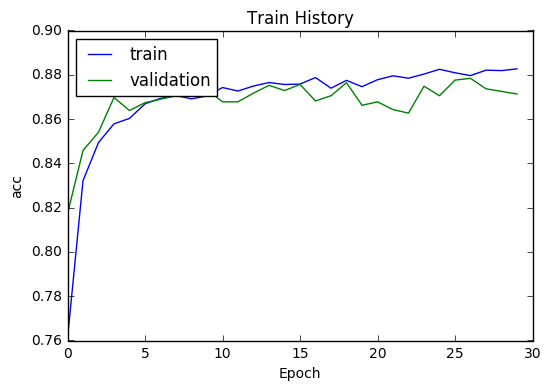

In [25]:
show_train_history(train_history,'acc','val_acc')

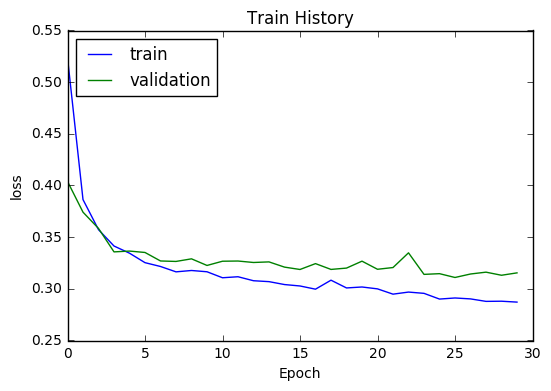

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 2s 278us/step


In [28]:
scores[1]

0.8625139397991411